In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def load_image():
    img = np.zeros((600, 600))
    img = cv2.putText(img, 'ABCDE',
                      org=(50, 300),
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                      fontScale=5,
                      color=(255, 255, 2555),
                      thickness=20)
    return img

In [22]:
def display_image(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

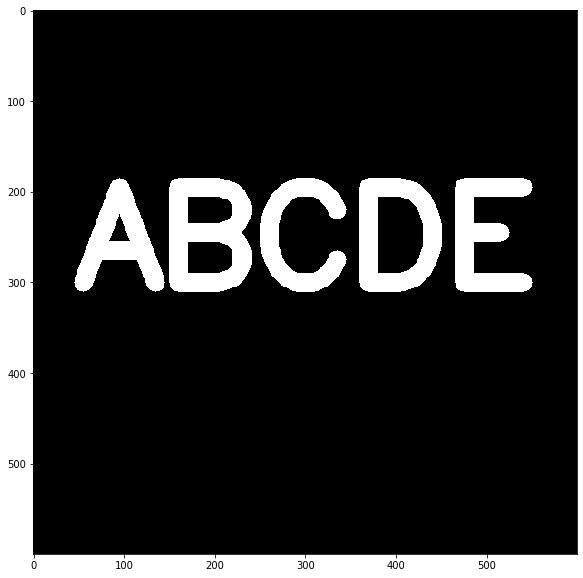

In [23]:
img = load_image()
display_image(img)

In [24]:
# DEMONSTRATE EROSION.
kernel = np.ones((5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

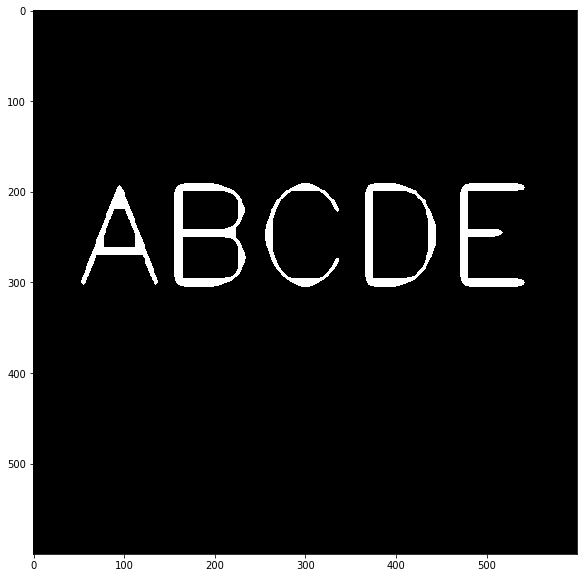

In [31]:
result = cv2.erode(img, kernel=kernel, iterations=3)
display_image(result)

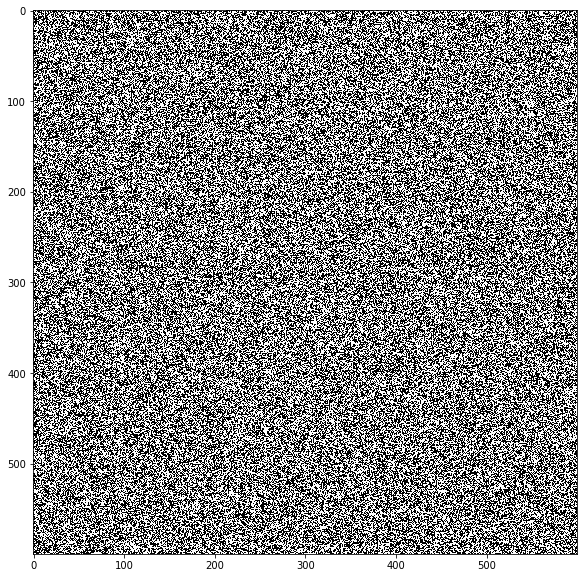

In [46]:
# DEMONSTRATE OPENING = EROSION FOLLOWED BY DILATION (Dilation is opposite of the  erosion).
# It's helpful to remove background noise.
img = load_image()
# Adding a white noise.
white_noise = np.random.randint(low=0, high=2, size=(600, 600))
display_image(white_noise)

In [47]:
white_noise = white_noise * 255

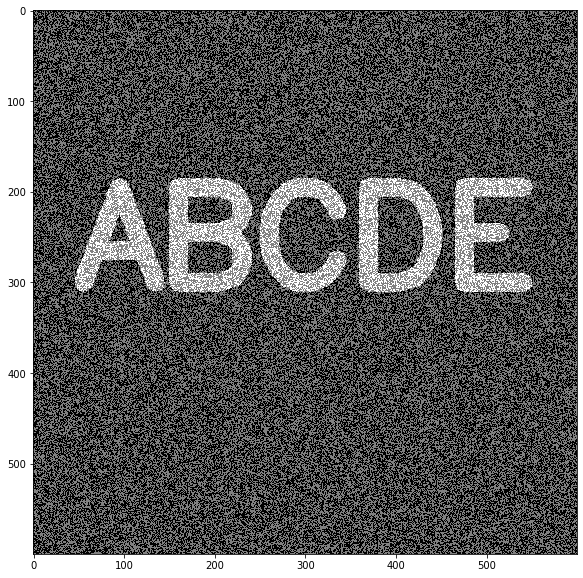

In [48]:
noisy_image = img + white_noise
display_image(noisy_image)

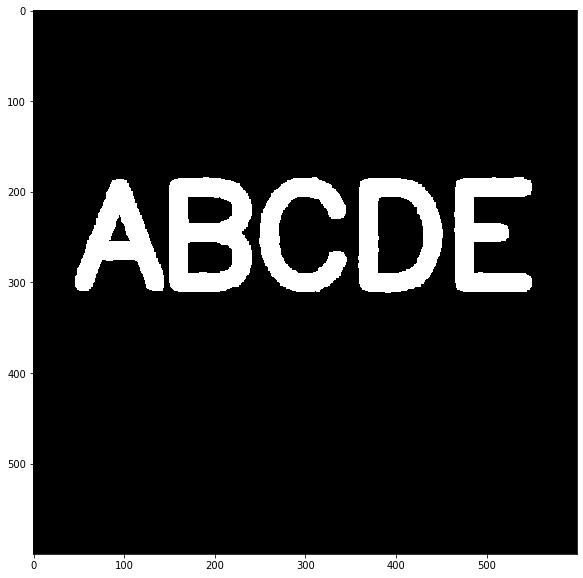

In [49]:
# Erosion and dilation of the image - OPENING
opening = cv2.morphologyEx(noisy_image, op=cv2.MORPH_OPEN, kernel=kernel)
display_image(opening)


In [51]:
# Morphological operation with foreground noise. Adding a Black noise.
black_noise = np.random.randint(low=0, high=2, size=(600, 600))

black_noise = black_noise * -255
black_noise

array([[-255,    0, -255, ...,    0,    0, -255],
       [   0,    0,    0, ..., -255,    0,    0],
       [-255,    0,    0, ...,    0,    0, -255],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [-255,    0, -255, ...,    0,    0, -255],
       [-255, -255,    0, ..., -255,    0,    0]])

In [56]:
# Adding black noise to the images.
noisy_image = black_noise + img
# Bringing -255 random values to 0 again.
noisy_image[noisy_image == -255] = 0

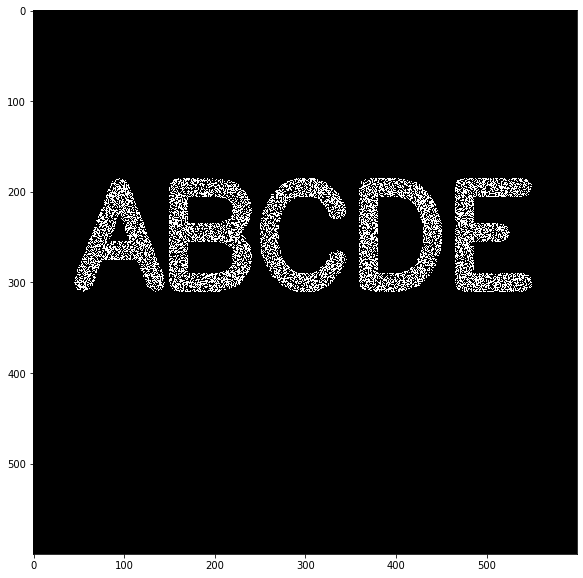

In [57]:
display_image(noisy_image)

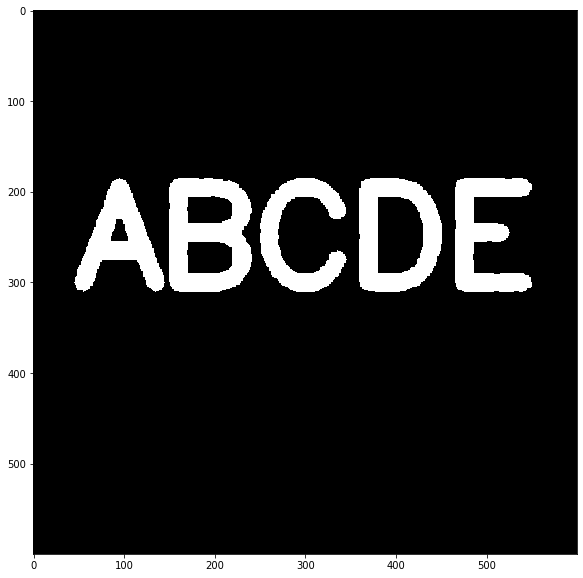

In [58]:
# Erosion and dilation of the image - CLOSING
closing = cv2.morphologyEx(noisy_image, op=cv2.MORPH_CLOSE, kernel=kernel)
display_image(closing)

In [59]:
# MORPHOLOGICAL GRADIENT - Just take the different between EROSION and DILATION.
img = load_image()

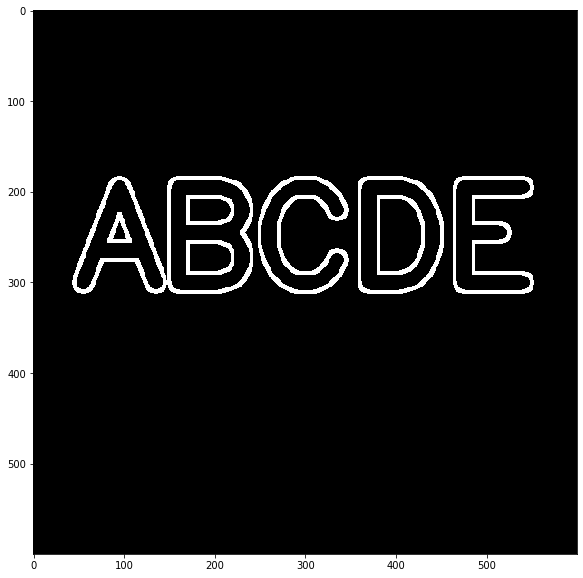

In [61]:
gradient = cv2.morphologyEx(img, op=cv2.MORPH_GRADIENT, kernel=kernel)
display_image(gradient)